## Regression

-  회귀분석(Regression Analysis) :  관찰된 여러 데이터를 기반으로 각 연속형 변수 간의 관계를 모델링하고 이에 대한 적합도를 측정하는 분석 방법
- 독립변수(independent variable)와 종속변수(dependent variable) 사이의 상호 관련성을 규명하는 것
- 선형 회귀 분석의 기본 가정 : 
  - 선형성 : 예측하고자 하는 종속변수 y와 독립변수 x 간에 선형성을 만족하는 특성
  - 독립성 : 독립변수 x 간에 상관관계가 없이 독립성을 만족하는 특성
  - 등분산성 : 특정한 패턴 없이 고르게 분포
  - 정규성 : 정규분포 

### Regression Vs Classification
- 분류 : 데이터 x의 여러 feature 값들을 이용하여 해당 데이터의 클래스 y를 추론하는 것
- 회귀 : 데이터 x의 여러 feature 값들을 이용하여 연관된 다른 데이터 y의 정확한 값을 추론하는 것


## Linear Regression
종속변수 Y와 한 개 이상의 독립변수 X와의 선형 상관관계를 모델링하는 회귀분석 기법

선형 회귀 식 : 

> $$ y = \beta x + ϵ$$<br>  $$(H = Wx + b)$$<br>
<br>
$ \beta : 회귀 계수 $   
$ \epsilon : 종속변수와 독립변수 사이의 오차 $

<br>

- 잔차(Residual) : 회귀 모델을 이용해 추정한 값과 실제 데이터의 차이
- Loss Function : 최소제곱법 ( n 개의 점 데이터에 대한 잔차의 제곱의 합을 최소로 하는 W, b 구하는 방법 )
- 결정계수 : R-squared or R2 score (1 에 가까울 수록 해당 모델이 데이터를 잘 표현)


### Boston House Price Dataset

In [ ]:
from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np

# 데이터 로드
boston = load_boston()
data, price = boston['data'], boston['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

df = pd.DataFrame(x_train, columns=boston['feature_names'])
print("boston dataset의 차원: ", data.shape)
print("price의 차원", price.shape)
print("boston train dataset의 차원: ", x_train.shape)
print("boston test dataset의 차원: ", x_test.shape)

print("Boston dataset의 예시")
df.head() # data 요약

boston dataset의 차원:  (506, 13)
price의 차원 (506,)
boston train dataset의 차원:  (404, 13)
boston test dataset의 차원:  (102, 13)
Boston dataset의 예시


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.08826,0.0,10.81,0.0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72
1,0.44791,0.0,6.20,1.0,0.507,6.726,66.5,3.6519,8.0,307.0,17.4,360.20,8.05
2,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39
3,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
4,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94


In [ ]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Applying Regression to Boston Dataset 

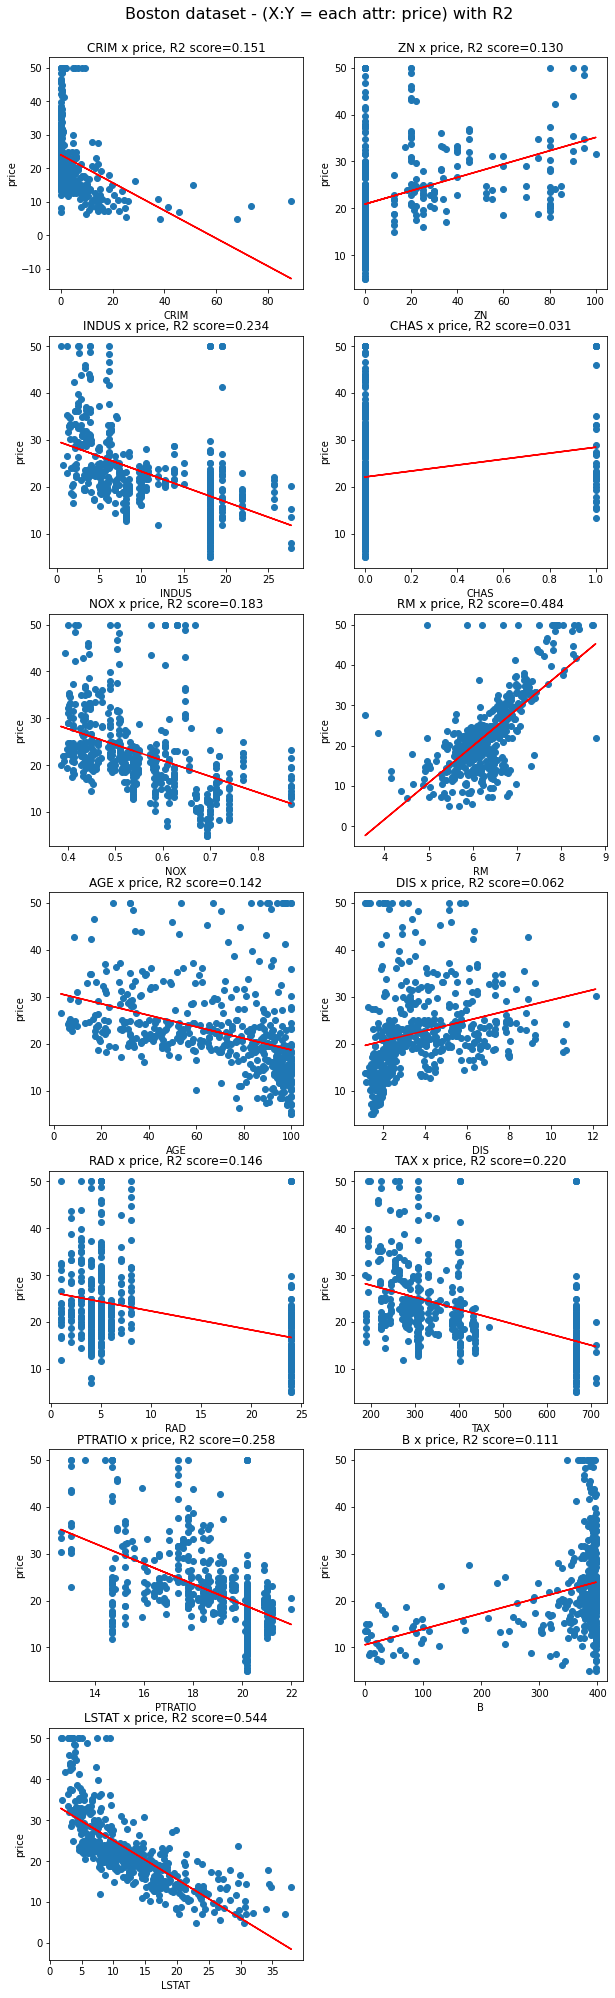

In [ ]:
# Boston dataset의 각 attribute에 선형회귀 적용하는 예제
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]): # boston dataset에서 i번째 attribute(column)을 살펴볼 거에요.

    single_attr, attr_name = data[:, i].reshape(-1, 1), boston['feature_names'][i] # i번째 attribute에 대한 data 및 이름
    estimator = LinearRegression() # 선형 회귀 모델이에요.

    #x에는 single_attr, y에는 price에 해당하는 데이터를 대입해서 최소제곱법을 이용하여 모델 내에서 W, b를 구하는 과정이에요
    estimator.fit(single_attr, price) 

    #위 fit() 과정을 통해 구한 회귀계수를 기반으로 회귀모델에 X값을 대입했을 때의 예측 Y 값이에요. 
    pred_price = estimator.predict(single_attr)

    score = metrics.r2_score(price, pred_price) # 결정계수를 구하는 함수에요. 

    # 캔버스 생성
    ax = fig.add_subplot(7, 2, i+1)
    ax.scatter(single_attr, price) # 실제 데이터에 대한 산포도
    ax.plot(single_attr, pred_price, color='red') # 선형회귀모델의 추세선
    ax.set_title("{} x price, R2 score={:.3f}".format(attr_name ,score)) #subplot의 제목이에요
    ax.set_xlabel(attr_name) # x축
    ax.set_ylabel('price') # y축

### Gradient Descent
- 적절한 회귀모델의 회귀계수를 찾기 위해서는 결국 손실함수를 잘 설정하는 것이 중요
- 머신러닝에서는 가중치의 그래디언트(미분값)가 최소가 되는 지점이 손실함수를 최소로 하는 지점일 것이라고 가정
- learning rate 를 조절해 최적의 가중치를 찾아 낼 수 있는 gradient value 를 업데이트 함
> $$ W := W -α\frac{∂}{∂W}J(W) $$ 
$ \alpha = learning$ $rate $

## Logistic Regression
로지스틱 회귀분석(Logistic Regression) : 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류

- 주로 이진 분류(Binary Classification) 문제에 많이 사용됨

- Logistic Regression 의 단계 : 
  1. 실제 데이터를 대입하여 Odds 및 회귀계수를 구한다.
  2. Log-odds를 계산한 후, 이를 sigmoid function의 입력으로 넣어서 특정 범주에 속할 확률 값을 계산한다.
  3. 설정한 threshold에 맞추어 설정값 이상이면 1, 이하면 0으로 이진 분류를 수행한다.

- Sigmoid Function : 
  - Log-odds 값을 0-1 사이의 값으로 변환
  - 두 범주 간 경계가 불명확해지는 x의 구간을 최소화해 주기 때문에 분류모델의 분류 성능을 매우 향상시켜 줌

### Data Load

In [ ]:
# 로지스틱 회귀분석 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y = 0(Malignant - 악성 종양), y=1(Benign - 양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Attribute 수: {}".format(len(cancer_X[0])))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Attribute 수: 30
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression() #로지스틱 회귀분석
LR.fit(train_X, train_y) # 유방암 train data를 이용하여 로지스틱 회귀분석 모델 학습
pred = LR.predict(test_X) # 학습된 로지스틱 회귀분석 모델을 이용한 예측값 출력


# 로지스틱 회귀분석 모델의 예측값과 실제값 비교결과를 나타낸 통계표
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.94      0.94      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Softmax & Cross Entropy
### Softmax
2가지가 아닌 여러 범주로 분류하는 함수 = Multi class classification에 적합

- 각 범주의 확률 값이 0에서 1 사이의 값 
- 모든 범주에 해당하는 softmax의 값을 전부 더했을 때 그 합이 1이 됨
- 큰 log-odds와 작은 log-odds의 차이를 극대화 -> 해당 데이터가 어떤 범주로 분류되는지 확실히 알 수 있게 되는데, 가장 큰 값을 1, 그 외 나머지 값들을 0으로 인코딩하는 one-hot encoding을 통해 표현

###Cross Entropy 
- softmax 함수의 손실함수<br>
- 로지스틱 회귀모델이 추론한 확률 분포 q(x)q(x)와 실제 데이터의 분포 p(x)p(x)의 차이를 계산한 것

  > $$ H(p,q) = -\displaystyle\sum_zp(x)logq(x) $$
  <br>
> $ p(x) : 실제 데이터의 범주 값 $<br>
> $ q(x) : softmax 의 결과 값 $

- 가중치가 최적화 될 수록 $H(p,q)$ 값이 감소


In [ ]:
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()
model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax', input_shape=(30,)))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 62        
                                                                 
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 1s 2ms/step - loss: 61.1631 - accuracy: 0.5645
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 37.2284 - accuracy: 0.2070
Epoch 3/20
16/16 [==============================] - 0s 2ms/step - loss: 31.4190 - accuracy: 0.1211
Epoch 4/20
16/16 [==============================] - 0s 2ms/step - loss: 29.8295 - accuracy: 0.1680
Epoch 5/20
16/16 [==============================] - 0s 2ms/step - loss: 28.2267 - accuracy: 0.1250
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 26.2813 - accuracy: 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()

#레이어 3장을 추가
model.add(keras.layers.Dense(n_dense, input_shape=(30,), use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))

model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 2)                 62        
                                                                 
Total params: 2,852
Trainable params: 2,852
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 0s 2ms/step - loss: 16.2360 - accuracy: 0.5645
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 4.6536 - accu